# NLP

## Inferential Modeling and Explanatory Analysis

### Warning: This nb contains subject matter pertaining to suicidal ideation and explitives

    import

In [47]:
import numpy as np
import pandas as pd

import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.feature_extraction.text import CountVectorizer

    Read

In [7]:
#before preprocessing
dep_clean = pd.read_csv("../data/r_depression_data/cleaned_depression_data.csv")
anx_clean = pd.read_csv("../data/r_anxiety_data/cleaned_anxiety_data.csv")
dep_clean["text"] = dep_clean["title"] + " " +  dep_clean["selftext"]
anx_clean["text"] = anx_clean["title"] + " " + anx_clean["selftext"]

#after preprocessing
dep_model = pd.read_csv("../data/r_depression_data/engineered_depression_data.csv")
anx_model = pd.read_csv("../data/r_anxiety_data/engineered_anxiety_data.csv")

    Downsampling

In [94]:
# downsample data to make search for top n-grams manageable
dep_tmp = pd.DataFrame(dep_clean[["text", "subreddit"]].sample(50000, replace=False, random_state=137))
anx_tmp = pd.DataFrame(anx_clean[["text", "subreddit"]].sample(50000, replace=False, random_state=137))
clean_data = pd.concat([dep_tmp, anx_tmp])
clean_data.reset_index(inplace=True)

dep = pd.DataFrame(dep_model[["text", "subreddit", "compound"]].sample(50000, replace=False, random_state=137))
anx = pd.DataFrame(anx_model[["text", "subreddit", "compound"]].sample(50000, replace=False, random_state=137))
model_data = pd.concat([dep, anx])
model_data.reset_index(inplace=True,drop=True)

    N-gram Prevalence

    before postprocessing

In [6]:
# count vectorizer is instantiated
cv = CountVectorizer(
    min_df = 0.0001,
    max_df = 1.0,
    ngram_range = (1,1)
)

In [7]:
# Credit to Jeffrey Floyd to cast counts astype(np.unit8)
# bag of words generated
dep_pre = cv.fit_transform(dep_tmp["text"])
df_dep_pre = pd.DataFrame(dep_pre.todense().astype(np.uint8), columns=cv.get_feature_names())

#saved to csv so this cell does not need to be run on kernel restart
cnt_df_dep_pre = df_dep_pre.sum().sort_values(ascending=False)
cnt_df_dep_pre.to_csv("../data/r_depression_data/cv_cnt_depression_prestop.csv")

In [8]:
#Credit to Jeffrey Floyd to cast counts astype(np.unit8)
# bag of words generated
anx_pre = cv.fit_transform(anx_tmp["text"])
df_anx_pre = pd.DataFrame(anx_pre.todense().astype(np.uint8), columns=cv.get_feature_names())

#saved to csv so this cell does not need to be run on kernel restart
cnt_df_anx_pre = df_anx_pre.sum().sort_values(ascending=False)
cnt_df_anx_pre.to_csv("../data/r_anxiety_data/cv_cnt_anxiety_prestop.csv")

In [24]:
#read in bag of words dataframes prior to preprocessing
dep_pre_cnt_df = pd.read_csv("../data/r_depression_data/cv_cnt_depression_prestop.csv", names=["unigram", "count"])
anx_pre_cnt_df = pd.read_csv("../data/r_Anxiety_data/cv_cnt_anxiety_prestop.csv", names=["unigram", "count"])

In [25]:
dep_pre_cnt_df["subreddit"] = "Depression"
anx_pre_cnt_df["subreddit"] = "Anxiety"

In [26]:
pre_cnt_df = pd.merge(left=dep_pre_cnt_df, right=anx_pre_cnt_df, on="unigram")

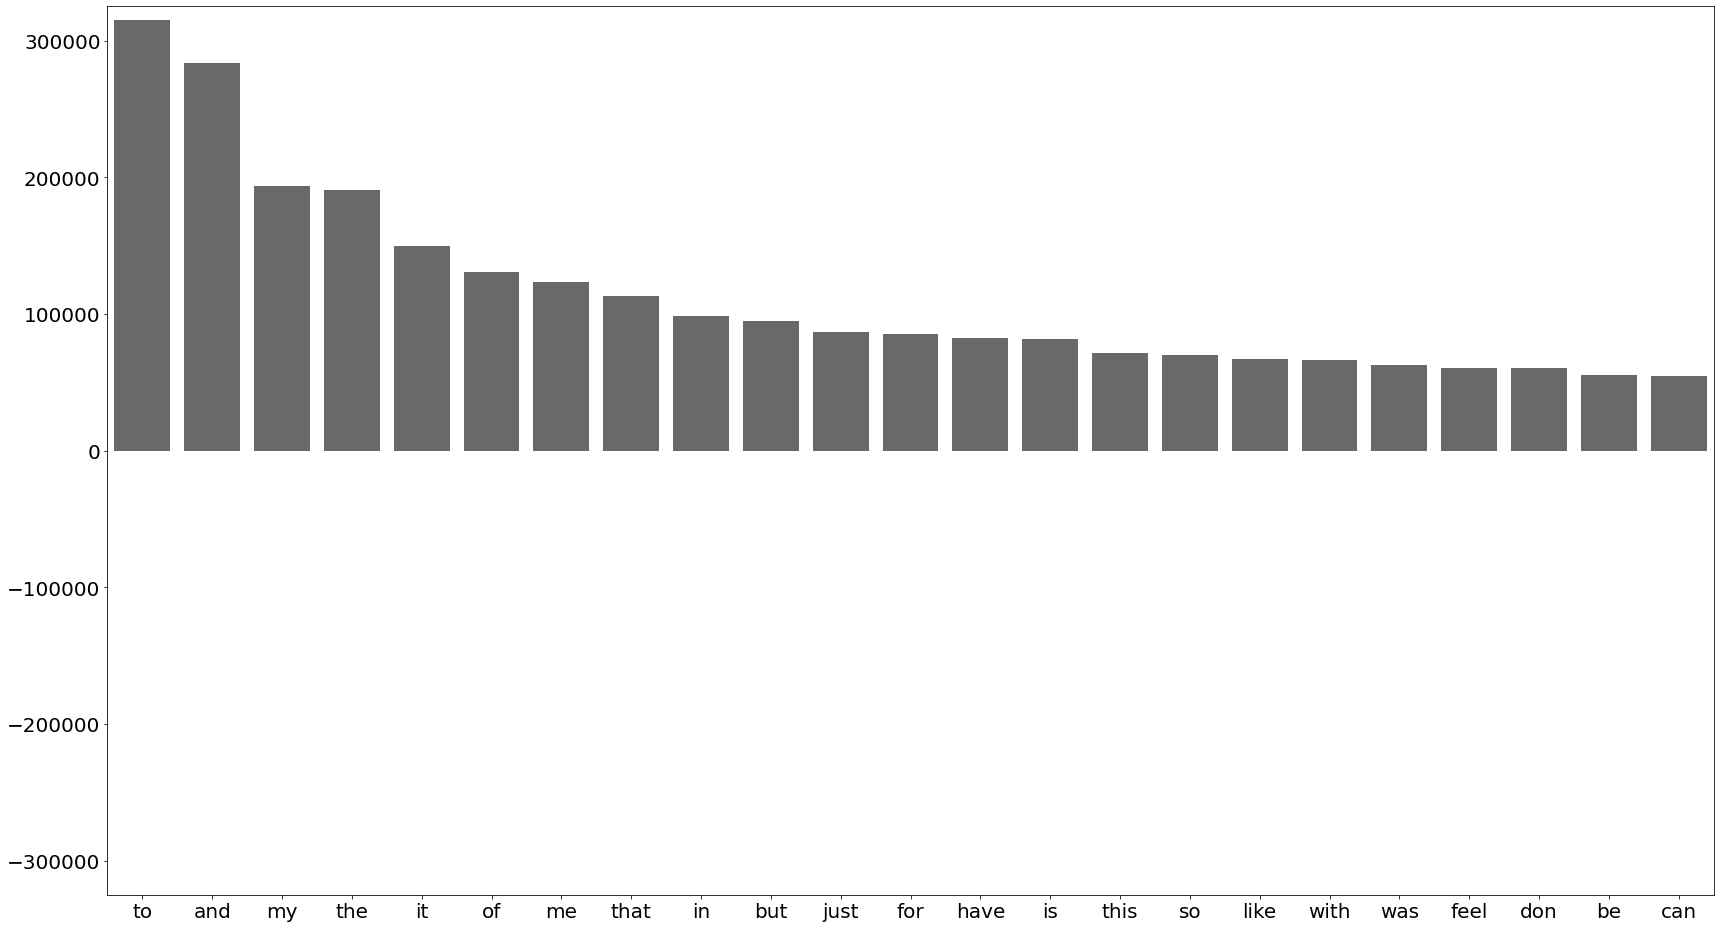

In [87]:
plt.figure(figsize=(24,13))
sns.barplot(data=dep_pre_cnt_df.iloc[0:24,:], x = "unigram", y = "count", color = "dimgrey")
plt.ylim(-325000,325000)
plt.xticks(fontsize=20)
plt.yticks(fontsize=20)
plt.xlabel("")
plt.ylabel("")
plt.tight_layout()
plt.savefig("../images/before_sw_dep", dpi=1000, transparent=True)

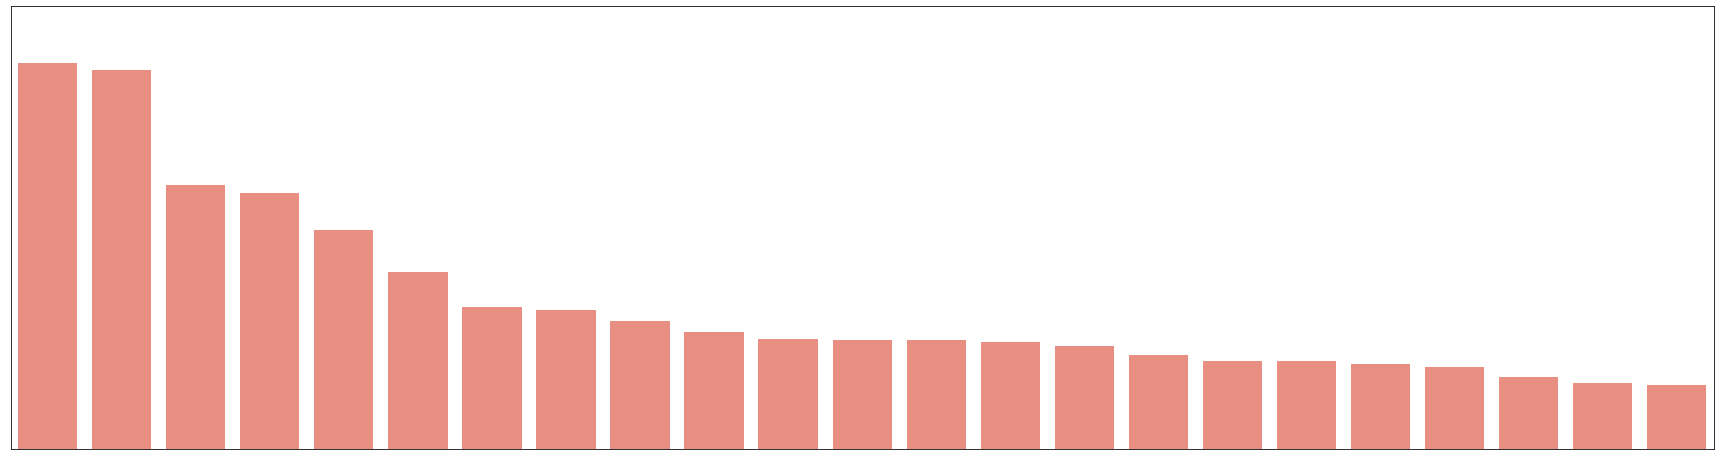

In [80]:
plt.figure(figsize=(24,6.5))
sns.barplot(data=anx_pre_cnt_df.iloc[0:24,:], x = "unigram", y = "count", color = "salmon")
plt.ylim(0,325000)
plt.ylabel("")
plt.xlabel("")
plt.xticks([],[])
plt.yticks([],[])
plt.tight_layout()
plt.savefig("../images/before_sw_anx", dpi=1000, transparent=True)

These visualizations are stiched together to form a plot of most frequent unigram count before preprocessing. With few expceptions this is display of stopwords.

    after postprocessing

In [99]:
# Count vectorizer is instantiated
cv_post = CountVectorizer(
    min_df = 0.0001,
    max_df = 1.0,
    ngram_range = (1,1)
)

In [16]:
# bag of words generated
dep_post = cv_post.fit_transform(dep["text"])
df_dep_post = pd.DataFrame(dep_post.todense().astype(np.uint8), columns=cv_post.get_feature_names())

# sum of word count in corpus
# saved to csv to be read on kernel restart
cnt_df_dep_post = df_dep_post.sum().sort_values(ascending=False)
cnt_df_dep_post.to_csv("../data/r_depression_data/cv_cnt_depression_poststop.csv")

In [17]:
# bag or words generated
anx_post = cv_post.fit_transform(anx["text"])
df_anx_post = pd.DataFrame(anx_post.todense().astype(np.uint8), columns=cv_post.get_feature_names())

# sum of word count in corpus
cnt_df_anx_post = df_anx_post.sum().sort_values(ascending=False)
cnt_df_anx_post.to_csv("../data/r_anxiety_data/cv_cnt_anxiety_poststop.csv")

In [88]:
# read in count of words in bag of words
dep_post_cnt_df = pd.read_csv("../data/r_depression_data/cv_cnt_depression_poststop.csv", names=["unigram", "count"])
anx_post_cnt_df = pd.read_csv("../data/r_Anxiety_data/cv_cnt_anxiety_poststop.csv", names=["unigram", "count"])

    uni-gram

In [114]:
# the process is repeated for a concatenated corpus of r/depression and r/Anxiety
md = cv_post.fit_transform(model_data["text"])
df_md  = pd.DataFrame(md.todense().astype(np.uint8), columns=cv_post.get_feature_names())

# count in entire corpus. saved to csv.
cnt_df_md = df_md.sum().sort_values(ascending=False)
cnt_df_md.to_csv("../data/model_data/cv_cnt_md.csv")

In [115]:
df_cnt = pd.read_csv("../data/model_data/cv_cnt_md.csv", names=["unigram", "count"])

In [117]:
df_cnt[3:24]

,unigram,count
3,anxiety,83381
4,know,73775
5,want,62139
6,life,56465
7,really,55633
8,time,54773
9,people,47564
10,going,38764
11,think,38243
12,day,35866


In [137]:
# add bag of words to df containing sent scores
sent_df_uni = model_data.join(df_md, rsuffix="cnt")

In [144]:
# top 100 unigrams:
# those present in documents with positive sentiment set minus those present with negative sentiment

set(sent_df_uni[sent_df_uni["compound"] > 0].iloc[:,3:].sum().sort_values(ascending=False).index[0:101])-\
set(sent_df_uni[sent_df_uni["compound"] <= 0].iloc[:,3:].sum().sort_values(ascending=False).index[0:101])

{'advice',
 'best',
 'care',
 'come',
 'friend',
 'great',
 'happy',
 'hope',
 'kind',
 'let',
 'love',
 'making',
 'pretty',
 'relationship',
 'social',
 'talking',
 'used',
 'wanted',
 'wish'}

In [182]:
# top 100 unigrams:
# those present in documents with negative sentiment set minus those present with psotive sentiment

neg_sent_uni = set(sent_df_uni[sent_df_uni["compound"] <= 0].iloc[:,3:].sum().sort_values(ascending=False).index[0:101])-\
set(sent_df_uni[sent_df_uni["compound"] > 0].iloc[:,3:].sum().sort_values(ascending=False).index[0:101])

In [185]:
# negative unigrams are isolated and plotted
sent_uni_series = sent_df_uni[sent_df_uni["compound"] <= 0].iloc[:,3:].sum().sort_values(ascending=False).filter(list(neg_sent_uni)).sort_values(ascending=False)

plt.figure(figsize=(16,9))
sns.barplot(x = sent_uni_series[0:5], y = sent_uni_series.index[0:5], color="dimgrey")

    bi-gram: process for unigrams repeated for bi-grams

In [118]:
cv_post_bigram = CountVectorizer(
    max_features=10000,
    min_df = 0.0001,
    max_df = 1.0,
    ngram_range = (2,2)
)

md_bi = cv_post_bigram.fit_transform(model_data["text"])
df_md_bi  = pd.DataFrame(md_bi.todense().astype(np.uint8), columns=cv_post_bigram.get_feature_names())

cnt_df_md_bi = df_md_bi.sum().sort_values(ascending=False)
cnt_df_md_bi.to_csv("../data/model_data/cv_cnt_md_bi.csv")

In [119]:
df_bi_cnt = pd.read_csv("../data/model_data/cv_cnt_md_bi.csv", names=["bigram", "count"])

In [120]:
df_bi_cnt[3:23]

,bigram,count
3,panic attack,6799
4,panic attacks,6259
5,mental health,5284
6,felt like,4458
7,years ago,3788
8,feeling like,3764
9,makes feel,3609
10,amp x200b,3579
11,high school,3264
12,dont know,3246


In [146]:
sent_df_bi = model_data.join(df_md_bi, rsuffix="cnt")

In [171]:
neg_sent_bi = set(sent_df_bi[sent_df_bi["compound"] <= 0].iloc[:,3:].sum().sort_values(ascending=False).index[0:101])-\
set(sent_df_bi[sent_df_bi["compound"] > 0].iloc[:,3:].sum().sort_values(ascending=False).index[0:101])

In [172]:
sent_bi_series = sent_df_bi[sent_df_bi["compound"] <= 0].iloc[:,3:].sum().sort_values(ascending=False).filter(list(neg_sent_bi)).sort_values(ascending=False)

plt.figure(figsize=(16,9))
sns.barplot(x = sent_bi_series[0:5], y = sent_bi_series.index[0:5], color="salmon")

    tri-gram: process for unigrams repeated for tri-grams

In [121]:
cv_post_trigram = CountVectorizer(
    max_features=10000,
    min_df = 0.0001,
    max_df = 1.0,
    ngram_range = (3,3)
)

md_tri = cv_post_trigram.fit_transform(model_data["text"])
df_md_tri  = pd.DataFrame(md_tri.todense().astype(np.uint8), columns=cv_post_trigram.get_feature_names())

cnt_df_md_tri = df_md_tri.sum().sort_values(ascending=False)
cnt_df_md_tri.to_csv("../data/model_data/cv_cnt_md_tri.csv")

In [122]:
df_tri_cnt = pd.read_csv("../data/model_data/cv_cnt_md_tri.csv", names=["trigram", "count"])

In [124]:
df_tri_cnt[3:23]

,trigram,count
3,makes feel like,953
4,long story short,751
5,anxiety panic attacks,713
6,feel like im,704
7,make feel better,619
8,feel like life,585
9,life feel like,583
10,time feel like,555
11,feel like need,530
12,know feel like,508


In [150]:
sent_df_tri = model_data.join(df_md_tri, rsuffix="cnt")

In [158]:
neg_sent_tri = set(sent_df_tri[sent_df_tri["compound"] <= 0].iloc[:,3:].sum().sort_values(ascending=False).index[0:101])-\
set(sent_df_tri[sent_df_tri["compound"] > 0].iloc[:,3:].sum().sort_values(ascending=False).index[0:101])

In [169]:
sent_tri_series = sent_df_tri[sent_df_tri["compound"] <= 0].iloc[:,3:].sum().sort_values(ascending=False).filter(list(neg_sent_tri)).sort_values(ascending=False)

In [173]:
sent_tri_series

plt.figure(figsize=(16,9))
sns.barplot(x = sent_tri_series[0:5], y = sent_tri_series.index[0:5], color="dimgrey")

hate hate hate                  457
fuck fuck fuck                  355
generalized anxiety disorder    237
getting worse worse             218
feel like dying                 181
anxiety panic attack            174
blown panic attack              172
feel like crying                171
major depressive disorder       167
bad panic attack                167
worst case scenario             159
like going die                  157
want live anymore               149
physical symptoms anxiety       148
anxiety really bad              143
dont feel like                  136
panic attacks anxiety           136
die want die                    135
couple weeks ago                134
panic attacks day               133
make things worse               130
keeps getting worse             129
feeling like shit               128
feel like bad                   127
tired feeling like              125
like going crazy                124
depression feel like            123
feels like going            

This explanatory analysis was conducted to compare n-gram frequency to strong predictors in the modeling step.

Creating a third class as a neutral reference point (source: r/Askreddit) and removing variations of "anxiety" and "depression" would shift predictors toward sentiment specific language and away from simple keywords.

This was not included in the presentation. I estimated it would carry the presentation past 10 minutes.